### Set the environment by importing the necessary dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### Load the data, check for null values and duplicates, and check the data types

In [2]:
# uploading the data
flights_data = pd.read_csv("flight_dataset.csv")
print(flights_data.head())
flights_data.drop(columns=["Unnamed: 0"],inplace=True)

# checking for null and duplicated values, and the data type of the variables
print(flights_data.isna().sum())
print(flights_data.duplicated().sum())
print(flights_data.info())

   Unnamed: 0   airline   flight source_city departure_time stops  \
0           0  SpiceJet  SG-8709       Delhi        Evening  zero   
1           1  SpiceJet  SG-8157       Delhi  Early_Morning  zero   
2           2   AirAsia   I5-764       Delhi  Early_Morning  zero   
3           3   Vistara   UK-995       Delhi        Morning  zero   
4           4   Vistara   UK-963       Delhi        Morning  zero   

    arrival_time destination_city    class  duration  days_left  price  
0          Night           Mumbai  Economy      2.17          1   5953  
1        Morning           Mumbai  Economy      2.33          1   5953  
2  Early_Morning           Mumbai  Economy      2.17          1   5956  
3      Afternoon           Mumbai  Economy      2.25          1   5955  
4        Morning           Mumbai  Economy      2.33          1   5955  
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_cit

### Check the correlation between the numerical variables
In particular, we are analyzing the relationship between duration, days_left, and price. Price is positively correlated to duration, and negatively correlated to days_left. Days_left and duration are negatively correlated between eachother. None of the values, however, are very high.

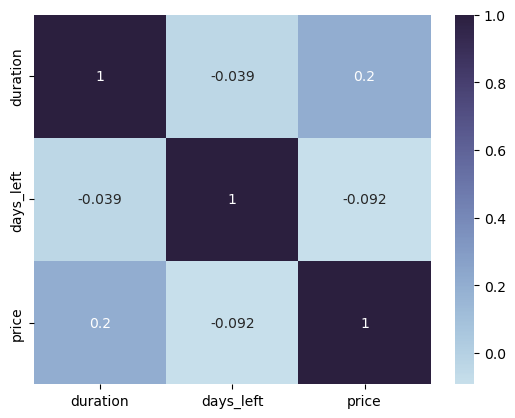

In [3]:
corr_df = flights_data.corr()
fig, ax = plt.subplots()
sns.heatmap(corr_df, annot=True, cmap=sns.color_palette('ch:s=.25,rot=-.25', as_cmap=True), ax=ax)
plt.savefig("Flight corr.png", dpi=300, bbox_inches='tight')
plt.show()

### Show the distribution of the numerical variables (duration first and days left second)
This was done by creating histograms showing the number of items in the dataset with the same duration and days left characteristics.

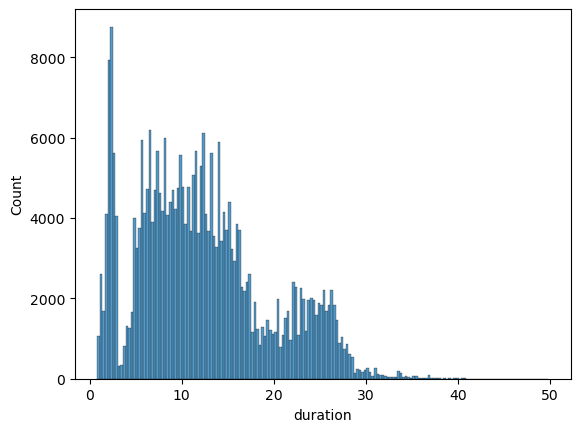

In [4]:
sns.histplot(data=flights_data['duration']);
plt.savefig("duration_distr.png", dpi=300, bbox_inches='tight')

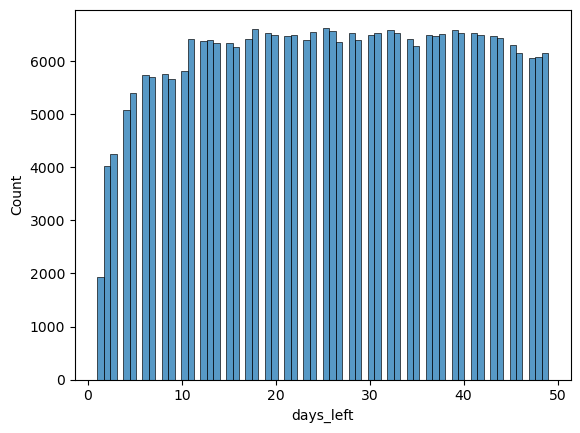

In [5]:
sns.histplot(data=flights_data['days_left']);
plt.savefig("daysleft_distr.png", dpi=300, bbox_inches='tight')

### Show the price according to the days left until the flight
This time we are analyzing the data through a lineplot, using the price for the y axis and the number of days left until the flight on the x axis. We can identify a negative relationship between the two variables.

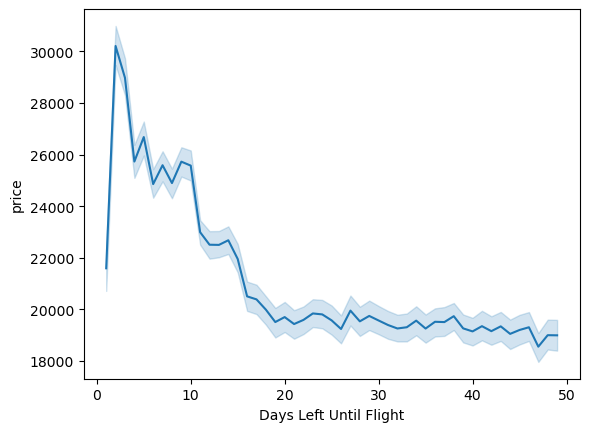

In [6]:
sns.lineplot(data=flights_data,x="days_left", y="price");
plt.xlabel("Days Left Until Flight")
plt.savefig("price_daysleft.png", dpi=300, bbox_inches='tight')
plt.show()

### Show the price according to the duration of the flight
Here we are once again analyzing the data through a lineplot, using the price for the y axis and the duration of the flight on the x axis. The price increases as the duration increases, but after the duration value surpasses 20 hours, the price starts decerasing. However, the price variance is higher after the 20 hours point.

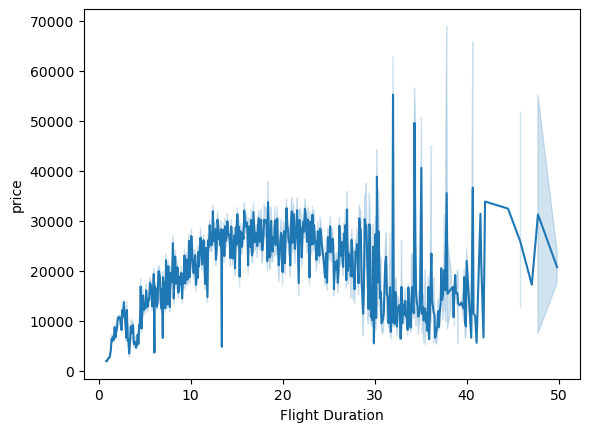

In [7]:
sns.lineplot(data=flights_data,x="duration", y="price");
plt.xlabel("Flight Duration")
plt.savefig("price_duration.png", dpi=300, bbox_inches='tight')
plt.show()

### Check the distribution of the target variable
We created an histogram including price on the x axis and number of flights on the y axis. Moreover, we gave different colors to flights in economy class and in business class. There is a sharp distinction between the prices of different classes. From this, we understood that class is a very significant variable in predicting the price of the ticket.

C:\Users\sp513-52n-89cp\AppData\Local\Temp\ipykernel_11456\2610282285.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


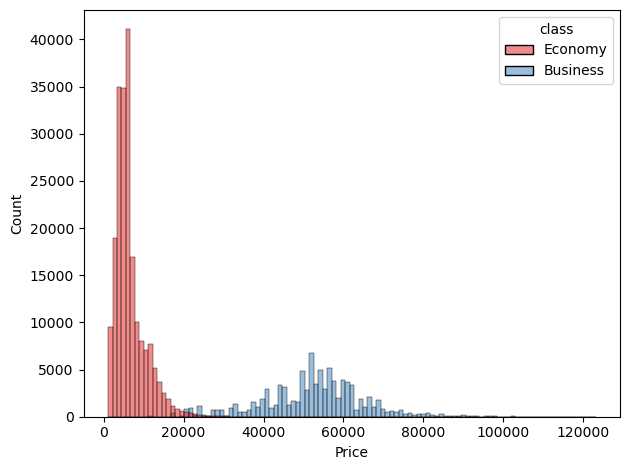

In [8]:
fig, ax = plt.subplots()
sns.histplot(data=flights_data, x="price", palette="Set1",hue="class", ax=ax)
plt.xlabel('Price')
fig.tight_layout()
plt.savefig("Target distribution.png", dpi=300, bbox_inches='tight')
fig.show()

### Show the range of price values for each of the class labels using box plots
Moving forward from the previous graph, we also decided to create a box plot dividing the price among economy class and business class tickets. We can derive similar results.

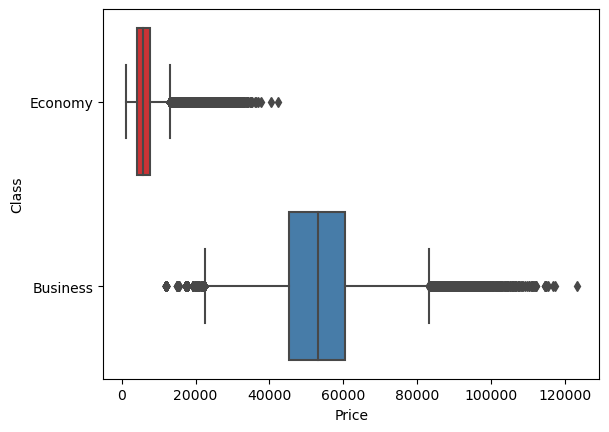

In [14]:
fig, ax = plt.subplots()
fig = sns.boxplot(data=flights_data,x="price", y="class", palette="Set1")
plt.xlabel('Price')
plt.ylabel('Class')
plt.savefig("Class_boxplots.png", dpi=300, bbox_inches='tight')
plt.show()

### Check the values of the categorical columns to decide on the best way to encode them
In particular, we decided to one hot encode all the categorical variables except for stops. In that specific case, in fact, we used ordinal encoding.

In [9]:
categorical_cols = ['airline','source_city','departure_time','arrival_time','destination_city','class','stops']
for col in categorical_cols:
    print(f"\n\n{col}\n\n",flights_data[f"{col}"].value_counts())



airline

 Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: airline, dtype: int64


source_city

 Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: source_city, dtype: int64


departure_time

 Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: departure_time, dtype: int64


arrival_time

 Night            91538
Evening          78323
Morning          62735
Afternoon        38139
Early_Morning    15417
Late_Night       14001
Name: arrival_time, dtype: int64


destination_city

 Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: destination_city, dtype: int64


class

 Economy     206666
Business     93487
Name: class, dtype: int64


stops

 one            250863
zero            3600

### Show the range of price values for each airline
This boxplot once again highlighted how economy class tickets are significantly lower than business class tickets. We were also able to see that Vistara e Air India are the only ones with business class tickets available.

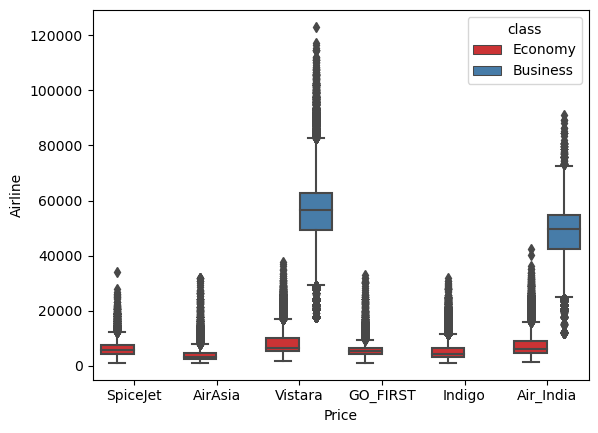

In [10]:
fig, ax = plt.subplots()
fig = sns.boxplot(data=flights_data,x="airline", y="price",hue="class",palette="Set1")
plt.xlabel('Price')
plt.ylabel('Airline')
plt.savefig("airlines_boxplots.png", dpi=300, bbox_inches='tight')
plt.show()

### Show the range of price values for each route
We created a box plot showing the price on the y axis, the city of departure on the x axis, and the city of distination as the color of the boxes. We can identify how there is a difference in ranges for certain cities (for instance, Delhi is the city with the lower price and lower range, regardless of whether it is a source or destination city).

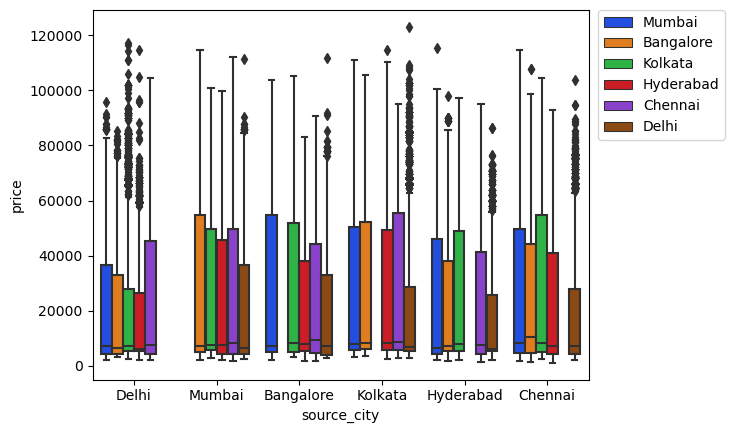

In [11]:
sns.boxplot(data=flights_data,x="source_city", y="price", hue="destination_city", palette="bright");
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0);
plt.savefig("price_route_boxplots.png", dpi=300, bbox_inches='tight')

### Show the range of price values for the departure time and arrival time
We created a box plot showing the price on the y axis, the departure time on the x axis, and the arrival time as the color of the boxes. Just like in the previous graph, we can identify differences in ranges. Moreover, it is possible to note what are the combinations of arrival and departure time more common, and what have higher price ranges.

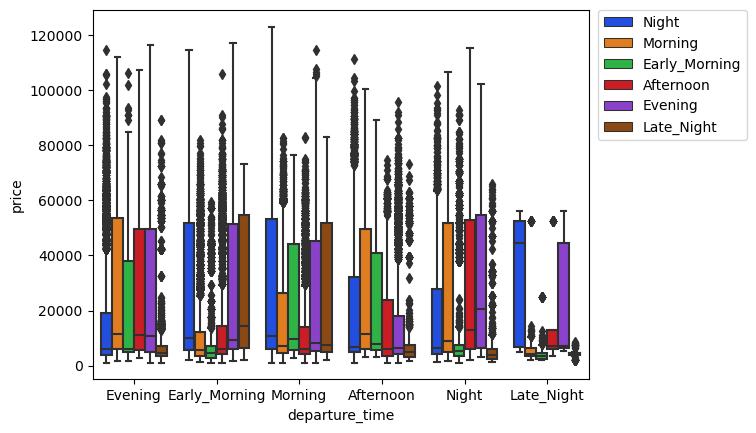

In [12]:
sns.boxplot(data=flights_data,x="departure_time", y="price", hue="arrival_time", palette="bright");
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0);
plt.savefig("price_time_boxplots.png", dpi=300, bbox_inches='tight')

### Show the range of price values for the quantity of stops
This box plot highlights how the price for flights with one stop has a much higher range than flights with zero, or more than two stops. Despite this, flights with zero and two or more stops have a larger number of outliers.

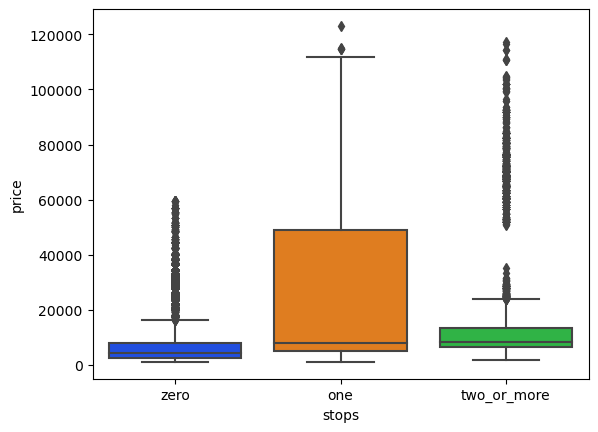

In [13]:
sns.boxplot(data=flights_data,x="stops", y="price", palette="bright");
plt.savefig("stops_boxplots.png", dpi=300, bbox_inches='tight')

## Stratifying the target variable then splitting the data into train and test sets
We decided to use stratified sampling by splitting the "bins" into batches each containing 20% of the total sample. This helped us better divide the data into training and test sets by taking into consideration the original distribution of our target variable (price).

In [69]:
#the flight number column is not relevant for our analysis, so we drop it
flights_data.drop('flight',axis=1,inplace=True)

target = 'price'
features = ['airline', 'source_city', 'departure_time', 'stops', 'arrival_time',
       'destination_city', 'class', 'duration', 'days_left','bins']

# Calculate the cut values for the stratification bins
percentiles = [20, 40, 60, 80]
cut_values = flights_data[target].quantile([p/100 for p in percentiles])

# Create a new column with the bin labels
flights_data['bins'] = pd.cut(flights_data[target], bins=[-float("inf")] + list(cut_values) + [float("inf")])

# Split the data into training and testing sets, stratified by the bins
X_train, X_test, y_train, y_test = train_test_split(flights_data[features], flights_data[target], test_size=0.2, stratify=flights_data['bins'], random_state=42)

y_test = pd.DataFrame(y_test)
y_train = pd.DataFrame(y_train)

# Drop the bin column
X_train.drop('bins',axis=1,inplace=True)
X_test.drop('bins',axis=1,inplace=True)

## Encoding the categorical variables

In [70]:
X_train_transformed = pd.get_dummies(X_train, columns = categorical_cols[0:6],drop_first=True)
X_test_transformed = pd.get_dummies(X_test, columns = categorical_cols[0:6],drop_first=True)

X_train_transformed['stops'] = X_train_transformed['stops'].replace({'zero':0,'one':1,'two_or_more':2})
X_test_transformed['stops'] = X_test_transformed['stops'].replace({'zero':0,'one':1,'two_or_more':2})

## Scaling the numerical variables

In [71]:
num_cols = ['duration','days_left']
ct = ColumnTransformer(
    [('scale', StandardScaler(), num_cols)], 
    remainder='passthrough')

num_scaled_train = ct.fit_transform(X_train_transformed[['duration','days_left']])
num_scaled_test = ct.transform(X_test_transformed[['duration','days_left']])

X_train_transformed.iloc[:, 1:3] = num_scaled_train
X_test_transformed.iloc[:, 1:3] = num_scaled_test

scaler_target = StandardScaler()

y_train['price'] = scaler_target.fit_transform(y_train[['price']].values)
y_test['price'] = scaler_target.transform(y_test[['price']].values)

## Regression Models
We tried 5 different models (linear regression, decision tree, random forest, knn, and svr).
For each, we started by importing the necessary material, setting up the model, fitting it on the training data, and using the obtained model to make predictions on the test set. Afterwards, we calculated the evaluation metrics. In particular, to compare our models we chose mean absolute error (mae), root mean squared error (rmse), and r squared.

### 1. Linear Regression

In [99]:
from sklearn.linear_model import LinearRegression

# Set up a regression model
lin_reg = LinearRegression()

# Fit the model on the training data
lin_reg.fit(X_train_transformed, y_train)

# Use the trained model to make predictions on the test set
y_pred = lin_reg.predict(X_test_transformed)

# Assessment metrics
mae_LR = mean_absolute_error(y_test, y_pred)
mse_LR = mean_squared_error(y_test, y_pred)
rmse_LR = np.sqrt(mse_LR)
r2_LR = r2_score(y_test, y_pred)

print("Mean absolute error:", mae_LR)
print("Root mean squared error:", rmse_LR)
print("R-squared:", r2_LR)

Mean absolute error: 0.1993366026424982
Root mean squared error: 0.30026841057955617
R-squared: 0.9096601200691319


### 2. Decision Tree

In [100]:
from sklearn.tree import DecisionTreeRegressor

# Set up a regression model
tree_reg = DecisionTreeRegressor()

# Fit the model on the training data
tree_reg.fit(X_train_transformed, y_train)

# Use the trained model to make predictions on the test set
y_pred = tree_reg.predict(X_test_transformed)

# Assessment metrics
mae_DT = mean_absolute_error(y_test, y_pred)
mse_DT = mean_squared_error(y_test, y_pred)
rmse_DT = np.sqrt(mse_DT)
r2_DT = r2_score(y_test, y_pred)

print("Mean absolute error:", mae_DT)
print("Root mean squared error:", rmse_DT)
print("R-squared:", r2_DT)

Mean absolute error: 0.051032282568945694
Root mean squared error: 0.15260707347594096
R-squared: 0.9766649064208512


### 3. Random Forest Regressor

In [102]:
from sklearn.ensemble import RandomForestRegressor

# Create a random forest regressor
rf = RandomForestRegressor(n_jobs=-1)

# Fit the model on the training data
rf.fit(X_train_transformed, y_train)

# Predict the target values for the test data
y_pred = rf.predict(X_test_transformed)

# Assessment metrics
mae_RF = mean_absolute_error(y_test, y_pred)
mse_RF = mean_squared_error(y_test, y_pred)
rmse_RF = np.sqrt(mse_RF)
r2_RF = r2_score(y_test, y_pred)

print("Mean absolute error:", mae_RF)
print("Root mean squared error:", rmse_RF)
print("R-squared:", r2_RF)

/var/folders/ll/s4f5rf0s5z9gxj3tj3ry06m00000gn/T/ipykernel_56168/2283953723.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train_transformed, y_train)


Mean absolute error: 0.04734970543939342
Root mean squared error: 0.12186047704861012
R-squared: 0.9851205812363051


In [103]:
decision_trees = rf.estimators_

for tree_idx, tree in enumerate(decision_trees):
    depth = tree.tree_.max_depth
    leaf_samples = tree.tree_.n_node_samples[tree.tree_.children_left == -1]
    min_samples = leaf_samples.min()
    max_samples = leaf_samples.max()
    print(f"Decision Tree {tree_idx+1} Minimum Leaf Node Samples: {min_samples}")
    print(f"Decision Tree {tree_idx+1} Maximum Leaf Node Samples: {max_samples}")
    print(f"Decision Tree {tree_idx+1} Depth: {depth}\n")

Decision Tree 1 Minimum Leaf Node Samples: 1
Decision Tree 1 Maximum Leaf Node Samples: 205
Decision Tree 1 Depth: 40

Decision Tree 2 Minimum Leaf Node Samples: 1
Decision Tree 2 Maximum Leaf Node Samples: 220
Decision Tree 2 Depth: 41

Decision Tree 3 Minimum Leaf Node Samples: 1
Decision Tree 3 Maximum Leaf Node Samples: 193
Decision Tree 3 Depth: 40

Decision Tree 4 Minimum Leaf Node Samples: 1
Decision Tree 4 Maximum Leaf Node Samples: 197
Decision Tree 4 Depth: 40

Decision Tree 5 Minimum Leaf Node Samples: 1
Decision Tree 5 Maximum Leaf Node Samples: 201
Decision Tree 5 Depth: 40

Decision Tree 6 Minimum Leaf Node Samples: 1
Decision Tree 6 Maximum Leaf Node Samples: 178
Decision Tree 6 Depth: 41

Decision Tree 7 Minimum Leaf Node Samples: 1
Decision Tree 7 Maximum Leaf Node Samples: 190
Decision Tree 7 Depth: 42

Decision Tree 8 Minimum Leaf Node Samples: 1
Decision Tree 8 Maximum Leaf Node Samples: 260
Decision Tree 8 Depth: 43

Decision Tree 9 Minimum Leaf Node Samples: 1
Dec

### 4. KNN

In [97]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_transformed, y_train)

y_pred = knn.predict(X_test_transformed)

# Assessment metrics
mae_KNN = mean_absolute_error(y_test, y_pred)
mse_KNN = mean_squared_error(y_test, y_pred)
rmse_KNN = np.sqrt(mse_KNN)
r2_KNN = r2_score(y_test, y_pred)

print("Mean absolute error:", mae_KNN)
print("Root mean squared error:", rmse_KNN)
print("R-squared:", r2)

Mean absolute error: 0.08136385047957145
Root mean squared error: 0.16971895842028933
R-squared: 0.9851620669715031


### 5. SVR

In [ ]:
from sklearn.svm import SVR

y_train_numpy = y_train.to_numpy()
y_train_numpy = np.ravel(y_train_numpy)

# Create a Support Vector Regression model and fit it on the training data
svr = SVR()
svr.fit(X_train_transformed, y_train_numpy)

y_pred = svr.predict(X_test_transformed)

# Assessment metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean absolute error:", mae)
print("Root mean squared error:", np.sqrt(mse))
print("R-squared:", r2)

#### From our assessment metrics we understood that the best performing model is the random forest regressor. Now, we can move on to tuning our hyperparameters.

In [45]:
X_train_transformed.reset_index(inplace=True)
y_train.reset_index(inplace=True)

# Split the training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_transformed, y_train, test_size=0.2, random_state=42)

# First, we define our parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [15, 20, 25],
    'min_samples_leaf': [4, 6, 8]
}

from sklearn.model_selection import RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, n_iter=30, cv=5, scoring='neg_mean_squared_error', random_state=42, n_jobs=-1)

# Fit the grid search to the training data
random_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params = random_search.best_params_
best_model = random_search.best_estimator_

In [49]:
y_pred = best_model.predict(X_val)

mae = mean_absolute_error(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print("Mean absolute error:", mae)
print("Root mean squared error:", np.sqrt(mse))
print("R-squared:", r2)

Mean absolute error: 0.7402699932841187
Mean squared root error: 1.2550826862460014
R-squared: 0.968984103758759


In [47]:
best_params

{'n_estimators': 200,
 'min_samples_split': 15,
 'min_samples_leaf': 8,
 'max_depth': 15}

In [81]:
# First, we define our parameter grid
param_grid = {
    'n_estimators': [200, 300],
    'max_depth': [15, 30, 45],
    'min_samples_split': [15, 25, 35],
    'min_samples_leaf': [8, 16, 24]
}

# Initialize GridSearchCV
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_train_transformed, y_train)

# Evaluating the results by looking at our best performing parameter and estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

/Users/jane/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/jane/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/jane/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/jane/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680:

/Users/jane/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/jane/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/jane/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/jane/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680:

/Users/jane/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/jane/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/jane/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/jane/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680:

/Users/jane/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/jane/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/jane/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/jane/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680:

/Users/jane/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/jane/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/jane/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/jane/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680:

/Users/jane/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/jane/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/jane/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/jane/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680:

/Users/jane/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/jane/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/jane/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/jane/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680:

/Users/jane/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/jane/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/jane/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/jane/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680:

/Users/jane/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/jane/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/jane/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/jane/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680:

/Users/jane/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/jane/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/jane/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/jane/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680:

In [82]:
best_params

{'max_depth': 30,
 'min_samples_leaf': 8,
 'min_samples_split': 15,
 'n_estimators': 300}

In [83]:
y_pred = best_estimator.predict(X_test_transformed)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean absolute error:", mae)
print("Root mean squared error:", np.sqrt(mse))
print("R-squared:", r2)

Mean absolute error: 0.055203046439131875
Root mean squared error: 0.12157258328395663
R-squared: 0.9851908030490645


In [84]:
# First, we define our parameter grid
param_grid = {
    'n_estimators': [300, 400],
    'max_depth': [30, 40, 50],
    'min_samples_split': [15],
    'min_samples_leaf': [8]
}

# Initialize GridSearchCV
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_train_transformed, y_train)

# Evaluating the results by looking at our best performing parameter and estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

/Users/jane/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/jane/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/jane/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/jane/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680:

/Users/jane/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/jane/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/jane/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [85]:
best_params

{'max_depth': 40,
 'min_samples_leaf': 8,
 'min_samples_split': 15,
 'n_estimators': 400}

In [86]:
y_pred = best_estimator.predict(X_test_transformed)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean absolute error:", mae)
print("Root mean squared error:", np.sqrt(mse))
print("R-squared:", r2)

Mean absolute error: 0.05517064412804081
Root mean squared error: 0.1216244215753753
R-squared: 0.985178171136247


## Model Selected

**The following parameters were chosen 'max_depth': 30, 'min_samples_leaf': 8, 'min_samples_split': 15, 'n_estimators': 300**

Even though the MAE of the Random Forest Regressor model with default parameters is lower, the minimum samples in leaf nodes is 1 so it is susceptible to noise and the max depth is much higher. This could lead to overfitting and may cause problems with new data. The RMSE and the R-squared values are slighly improved. Either way, in both cases the models are robust. The choice of the model thus aims to have a better generelazition.

In [96]:
from sklearn.ensemble import RandomForestRegressor

# Create a random forest regressor
rf = RandomForestRegressor(max_depth=30, min_samples_leaf=8,min_samples_split=15,n_estimators=300,n_jobs=-1)

# Fit the model on the training data
rf.fit(X_train_transformed, y_train)

# Predict the target values for the test data
y_pred = rf.predict(X_test_transformed)

# Assessment metrics
mae_RF_tuned = mean_absolute_error(y_test, y_pred)
mse_RF_tuned = mean_squared_error(y_test, y_pred)
rmse_RF_tuned = np.sqrt(mse)
r2_RF_tuned = r2_score(y_test, y_pred)

print("Mean absolute error:", mae_RF_tuned)
print("Root mean squared error:", rmse_RF_tuned)
print("R-squared:", r2_RF_tuned)

/var/folders/ll/s4f5rf0s5z9gxj3tj3ry06m00000gn/T/ipykernel_56168/1462344107.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train_transformed, y_train)


Mean absolute error: 0.055209169488026386
Root mean squared error: 0.12169047712086942
R-squared: 0.9852011252343169


In [106]:
models = ['Linear Regression', 'Decision Tree', 'Random Forest Regressor', 'KNN', 'Tuned Random Forest Regressor']
mae = [mae_LR, mae_DT, mae_RF, mae_KNN, mae_RF_tuned]
rmse = [rmse_LR, rmse_DT, rmse_RF, rmse_KNN, rmse_RF_tuned]
r2 = [r2_LR, r2_DT, r2_RF, r2_KNN, r2_RF_tuned]

performance_metrics = pd.DataFrame()

performance_metrics['Models'] = models
performance_metrics['MAE'] = mae
performance_metrics['RMSE'] = rmse
performance_metrics['R-Squared'] = r2

print(performance_metrics)

                          Models       MAE      RMSE  R-Squared
0              Linear Regression  0.199337  0.300268   0.909660
1                  Decision Tree  0.051032  0.152607   0.976665
2        Random Forest Regressor  0.047350  0.121860   0.985121
3                            KNN  0.081364  0.169719   0.971138
4  Tuned Random Forest Regressor  0.055209  0.121690   0.985201


In [14]:
conda env export > environment.yml


Note: you may need to restart the kernel to use updated packages.
